In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import seaborn as sns

### Reading the data (5min Intraday data for RYAAY Holdings)

In [8]:
df = pd.read_csv("RYAAY.csv")

In [9]:
df.head()

,Date,Time,Open,High,Low,Close,Up,Down
0,03/23/2015,09:35,67.21,67.23,66.96,67.16,4661,585
1,03/23/2015,09:40,67.15,67.28,67.15,67.28,487,195
2,03/23/2015,09:45,67.22,67.30,67.16,67.17,390,973
3,03/23/2015,09:50,67.14,67.14,66.99,66.99,389,1461
4,03/23/2015,09:55,66.93,67.02,66.90,67.02,1242,292


### Data Preprocessing

In [10]:
df['DateTime'] = df['Date'] + ' ' + df['Time']

In [11]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [12]:
df = df.set_index('DateTime')

In [13]:
df.head()

,Date,Time,Open,High,Low,Close,Up,Down
DateTime,,,,,,,,
2015-03-23 09:35:00,03/23/2015,09:35,67.21,67.23,66.96,67.16,4661,585
2015-03-23 09:40:00,03/23/2015,09:40,67.15,67.28,67.15,67.28,487,195
2015-03-23 09:45:00,03/23/2015,09:45,67.22,67.30,67.16,67.17,390,973
2015-03-23 09:50:00,03/23/2015,09:50,67.14,67.14,66.99,66.99,389,1461
2015-03-23 09:55:00,03/23/2015,09:55,66.93,67.02,66.90,67.02,1242,292


In [14]:
df = df.drop(['Date','Time'],axis=1)

In [15]:
df.head()

,Open,High,Low,Close,Up,Down
DateTime,,,,,,
2015-03-23 09:35:00,67.21,67.23,66.96,67.16,4661,585
2015-03-23 09:40:00,67.15,67.28,67.15,67.28,487,195
2015-03-23 09:45:00,67.22,67.30,67.16,67.17,390,973
2015-03-23 09:50:00,67.14,67.14,66.99,66.99,389,1461
2015-03-23 09:55:00,66.93,67.02,66.90,67.02,1242,292


In [24]:
df1 = df.copy()

In [25]:
#pd.options.display.max_rows = 50

In [26]:
df1.isna().sum()

Open     0
High     0
Low      0
Close    0
Up       0
Down     0
dtype: int64

In [437]:
#df1 = df1.dropna()

In [438]:
#df1.isna()

,marketClose
DateTime,
02-04-2019 09:30,False
02-04-2019 09:31,False
02-04-2019 09:32,False
02-04-2019 09:33,False
02-04-2019 09:34,False
...,...
09-04-2020 15:55,False
09-04-2020 15:56,False
09-04-2020 15:57,False


In [18]:
df1.describe()

,Open,High,Low,Close,Up,Down
count,57789.000000,57789.000000,57789.000000,57789.000000,57789.000000,57789.000000
mean,88.411666,88.479626,88.344114,88.412005,2051.587153,2043.906020
std,16.712829,16.722938,16.704953,16.714413,5173.245398,4861.741544
min,65.060000,65.150000,64.970000,65.030000,0.000000,0.000000
25%,76.220000,76.290000,76.170000,76.220000,400.000000,400.000000
50%,82.750000,82.810000,82.690000,82.740000,1000.000000,1000.000000
75%,105.010000,105.090000,104.930000,105.010000,2278.000000,2261.000000
max,127.610000,127.610000,127.490000,127.530000,570569.000000,407597.000000


### Feature Engineering

In [27]:
df1['logReturn'] = np.log(df1.Close/df1.Close.shift(1))*100

In [28]:
df1.head()

,Open,High,Low,Close,Up,Down,logReturn
DateTime,,,,,,,
2015-03-23 09:35:00,67.21,67.23,66.96,67.16,4661,585,NaN
2015-03-23 09:40:00,67.15,67.28,67.15,67.28,487,195,0.178518
2015-03-23 09:45:00,67.22,67.30,67.16,67.17,390,973,-0.163630
2015-03-23 09:50:00,67.14,67.14,66.99,66.99,389,1461,-0.268336
2015-03-23 09:55:00,66.93,67.02,66.90,67.02,1242,292,0.044773


In [31]:
df1['vol_sqd_return'] = round((df1['logReturn'])**2,6)

In [32]:
df1.tail()

,Open,High,Low,Close,Up,Down,logReturn,vol_sqd_return
DateTime,,,,,,,,
2018-03-22 15:40:00,124.64,124.71,124.63,124.65,5900,7700,-0.008022,0.000064
2018-03-22 15:45:00,124.65,124.70,124.58,124.62,1400,2509,-0.024070,0.000579
2018-03-22 15:50:00,124.53,124.56,124.44,124.51,1400,3300,-0.088307,0.007798
2018-03-22 15:55:00,124.58,124.70,124.49,124.64,4000,5400,0.104355,0.010890
2018-03-22 16:00:00,124.63,124.70,124.60,124.66,14240,10000,0.016045,0.000257


In [351]:
df1['vol_sqd_return']

DateTime
02-04-2019 09:30         NaN
02-04-2019 09:31    0.000562
02-04-2019 09:32    0.000053
02-04-2019 09:33    0.000015
02-04-2019 09:34    0.000001
                      ...   
09-04-2020 15:55    0.000372
09-04-2020 15:56    0.000001
09-04-2020 15:57    0.000053
09-04-2020 15:58    0.000199
09-04-2020 15:59    0.000490
Name: vol_sqd_return, Length: 96327, dtype: float64

### Summarized Statistics

In [91]:
df1.describe()

,Open,High,Low,Close,Up,Down,logReturn,vol_sqd_return,abs_return
count,57788.000000,57788.000000,57788.000000,57788.000000,57788.000000,57788.000000,57788.000000,57788.000000,57788.000000
mean,88.412033,88.479993,88.344484,88.412373,2051.541998,2043.931266,0.001070,0.045892,0.105727
std,16.712741,16.722849,16.704861,16.714324,5173.278771,4861.779822,0.214222,0.991390,0.186317
min,65.060000,65.150000,64.970000,65.030000,0.000000,0.000000,-13.764461,0.000000,0.000000
25%,76.220000,76.290000,76.170000,76.220000,400.000000,400.000000,-0.069306,0.000814,0.028539
50%,82.750000,82.810000,82.690000,82.740000,1000.000000,1000.000000,0.000000,0.004833,0.069523
75%,105.010000,105.090000,104.930000,105.010000,2278.000000,2261.000000,0.069751,0.017066,0.130636
max,127.610000,127.610000,127.490000,127.530000,570569.000000,407597.000000,6.277504,189.460396,13.764461


## Plotting Returns and Close Price

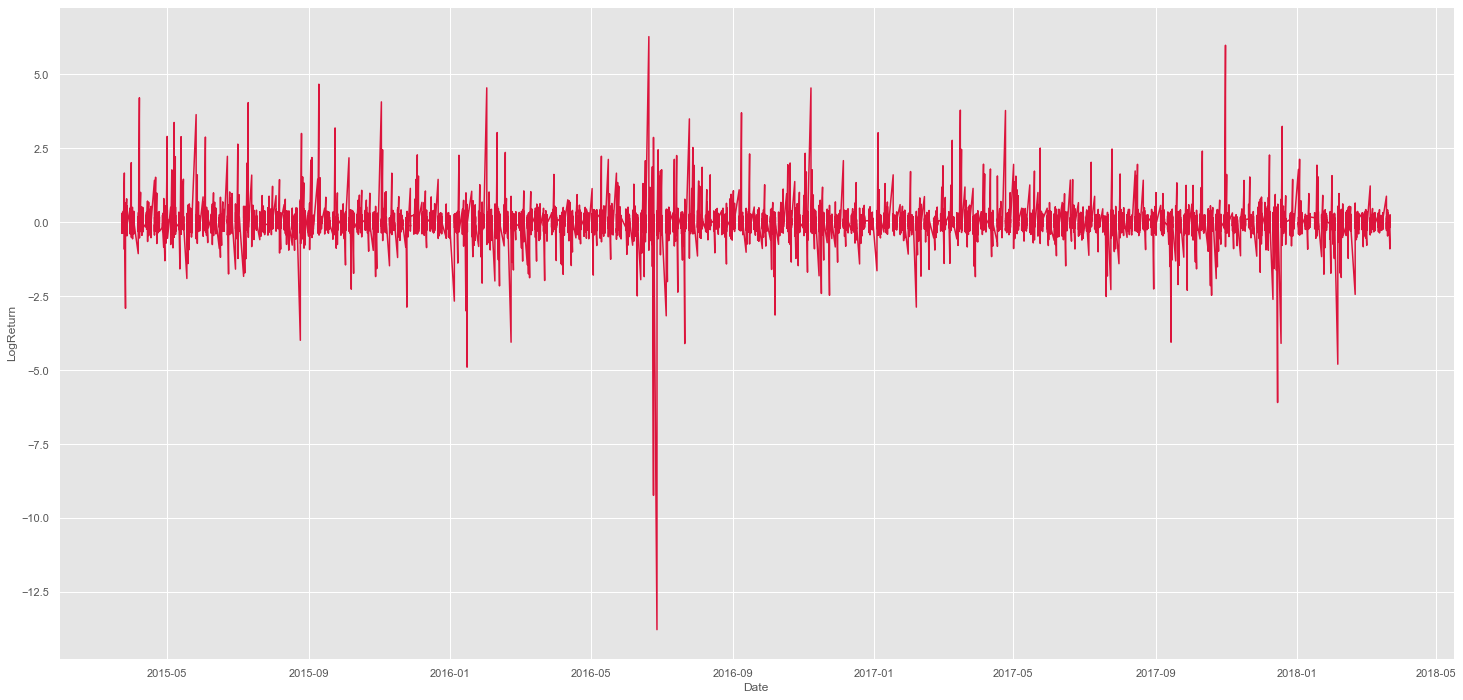

In [92]:
plt.figure(figsize=(25,12))
plt.xlabel('Date')
plt.ylabel('LogReturn')
plt.plot('logReturn',data=df1,color='Crimson')

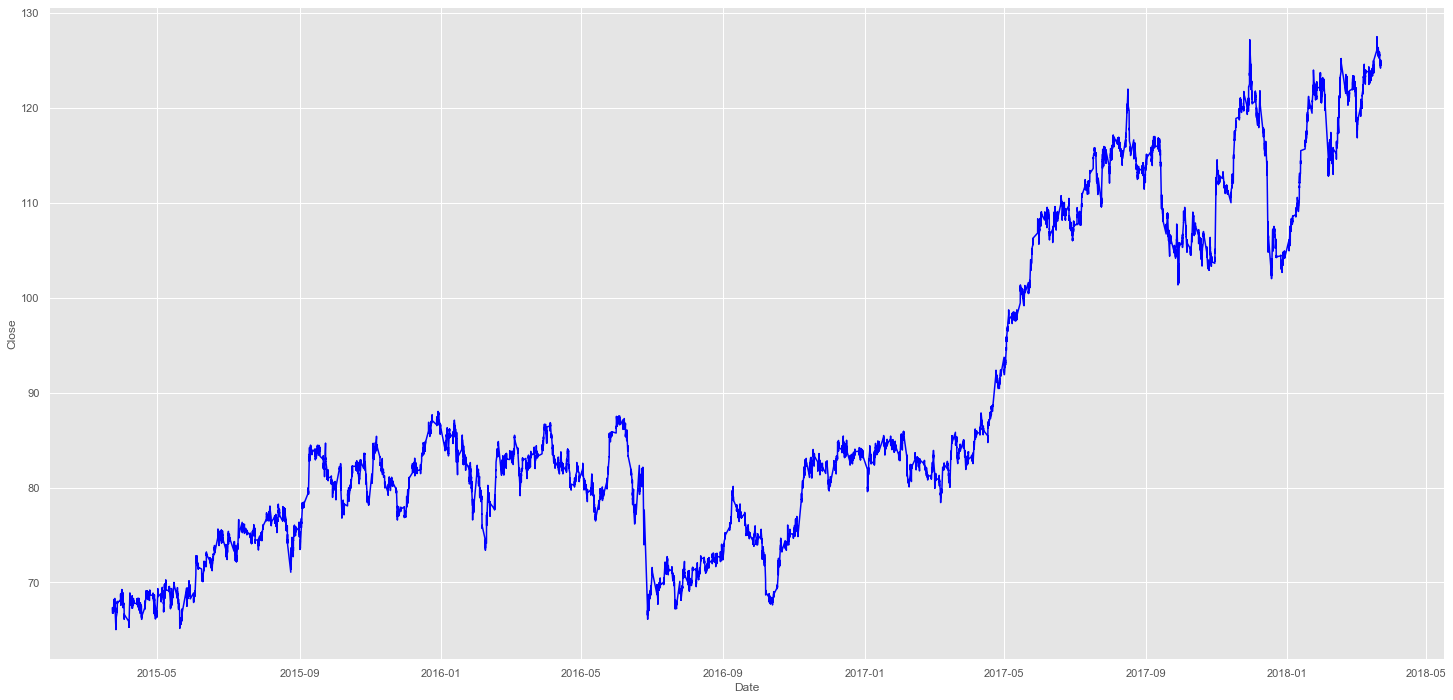

In [94]:
plt.figure(figsize=(25,12))
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot('Close',data=df1,color='Blue')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

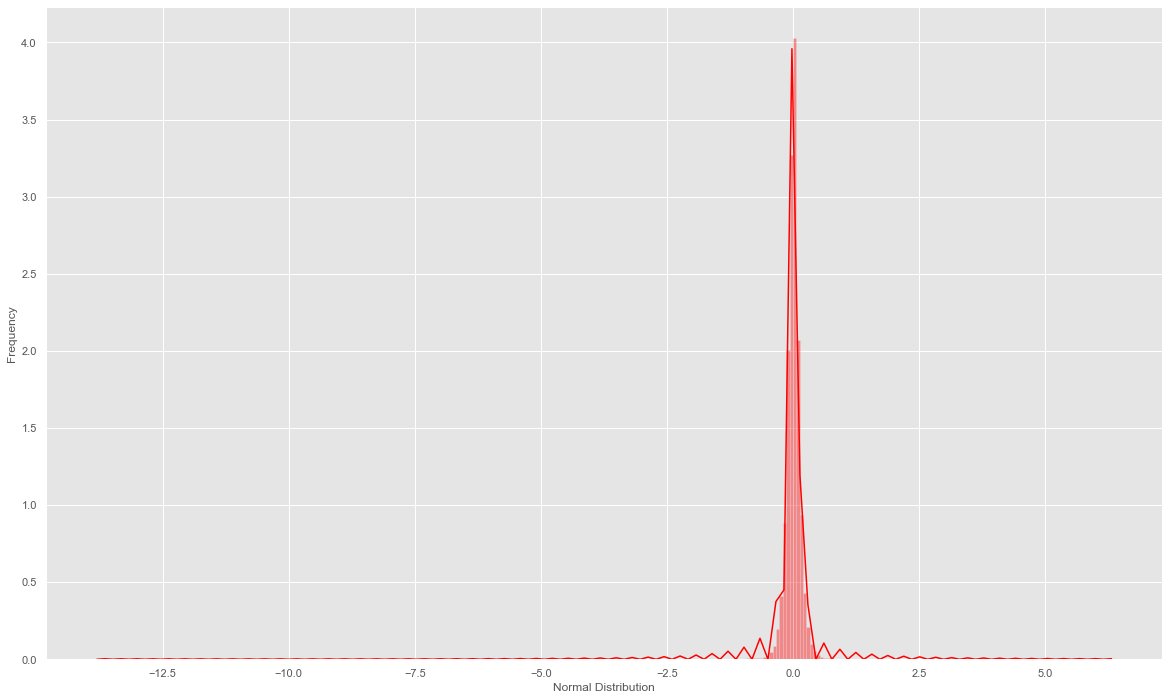

In [96]:
plt.figure(figsize=(20, 12))
ax = sns.distplot(df1['logReturn'],
                  bins=300,
                  kde=True,
                  color='Red')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## Synthetic Data Generation/Simulation Using Inverse CDF (Cumulative Distribution Function)

In [97]:
df1['AbsLog'] = abs(df1['logReturn'])

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
df1.head()

,Open,High,Low,Close,Up,Down,logReturn,vol_sqd_return,abs_return,AbsLog
DateTime,,,,,,,,,,
2015-03-23 09:40:00,67.15,67.28,67.15,67.28,487,195,0.178518,0.031869,0.178518,0.178518
2015-03-23 09:45:00,67.22,67.30,67.16,67.17,390,973,-0.163630,0.026775,0.163630,0.163630
2015-03-23 09:50:00,67.14,67.14,66.99,66.99,389,1461,-0.268336,0.072004,0.268336,0.268336
2015-03-23 09:55:00,66.93,67.02,66.90,67.02,1242,292,0.044773,0.002005,0.044773,0.044773
2015-03-23 10:00:00,67.04,67.09,66.87,66.87,1066,584,-0.224065,0.050205,0.224065,0.224065


In [99]:
## PDF
df1['pdf'] = df1['AbsLog']/(df1['AbsLog'].sum())

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
df1.head()

,Open,High,Low,Close,Up,Down,logReturn,vol_sqd_return,abs_return,AbsLog,pdf
DateTime,,,,,,,,,,,
2015-03-23 09:40:00,67.15,67.28,67.15,67.28,487,195,0.178518,0.031869,0.178518,0.178518,0.000029
2015-03-23 09:45:00,67.22,67.30,67.16,67.17,390,973,-0.163630,0.026775,0.163630,0.163630,0.000027
2015-03-23 09:50:00,67.14,67.14,66.99,66.99,389,1461,-0.268336,0.072004,0.268336,0.268336,0.000044
2015-03-23 09:55:00,66.93,67.02,66.90,67.02,1242,292,0.044773,0.002005,0.044773,0.044773,0.000007
2015-03-23 10:00:00,67.04,67.09,66.87,66.87,1066,584,-0.224065,0.050205,0.224065,0.224065,0.000037


In [104]:
round(df1['pdf'].sum())

1.0

In [105]:
df1['cdf'] = df1['pdf'].cumsum()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
df1.head()

,Open,High,Low,Close,Up,Down,logReturn,vol_sqd_return,abs_return,AbsLog,pdf,cdf
DateTime,,,,,,,,,,,,
2015-03-23 09:40:00,67.15,67.28,67.15,67.28,487,195,0.178518,0.031869,0.178518,0.178518,0.000029,0.000029
2015-03-23 09:45:00,67.22,67.30,67.16,67.17,390,973,-0.163630,0.026775,0.163630,0.163630,0.000027,0.000056
2015-03-23 09:50:00,67.14,67.14,66.99,66.99,389,1461,-0.268336,0.072004,0.268336,0.268336,0.000044,0.000100
2015-03-23 09:55:00,66.93,67.02,66.90,67.02,1242,292,0.044773,0.002005,0.044773,0.044773,0.000007,0.000107
2015-03-23 10:00:00,67.04,67.09,66.87,66.87,1066,584,-0.224065,0.050205,0.224065,0.224065,0.000037,0.000144


Text(0, 0.5, 'Cumulative Probability Distribution')

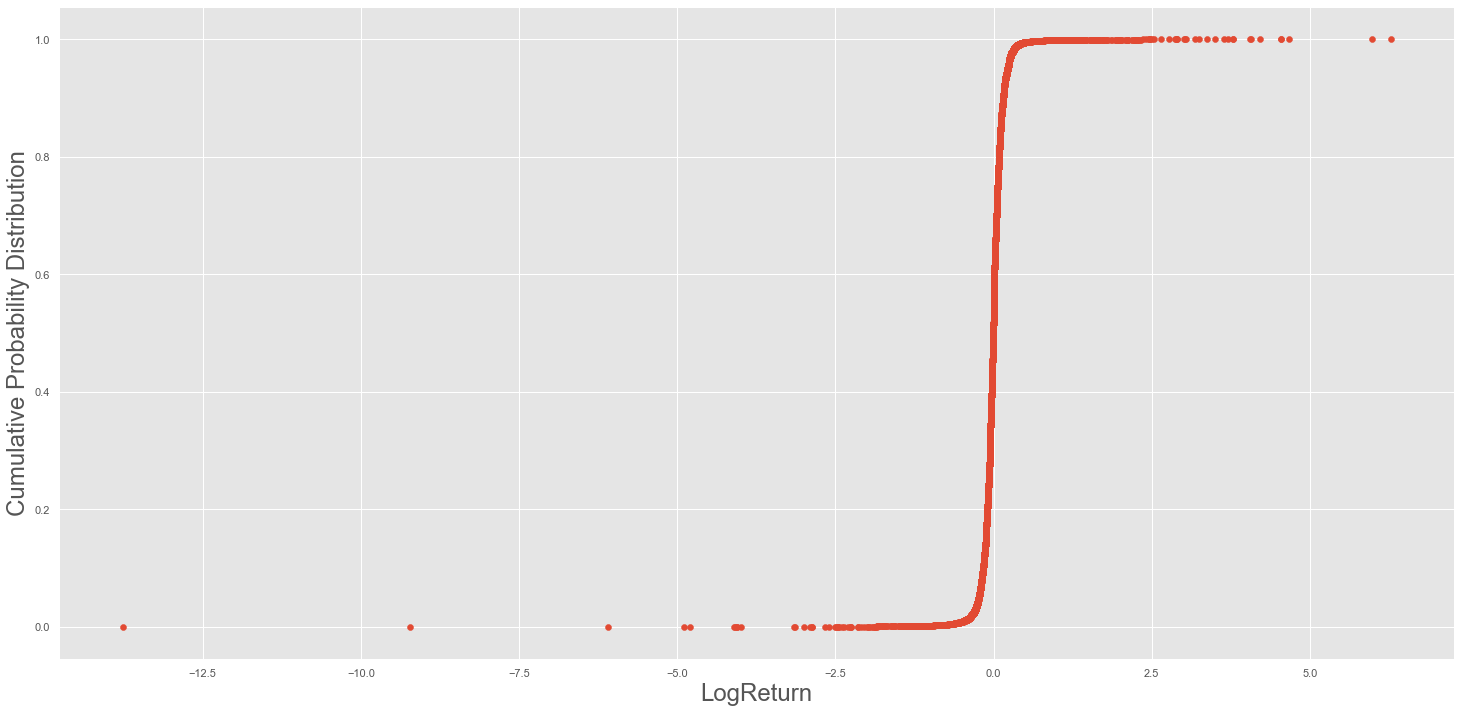

In [107]:
x = np.sort(df1['logReturn'])
y = df1['cdf']
plt.figure(figsize=(25,12))
plt.scatter(x=x, y=y);
plt.xlabel('LogReturn', fontsize=24)
plt.ylabel('Cumulative Probability Distribution', fontsize=24)

## Sampling (Interpolation)

In [110]:
from scipy import interpolate

In [116]:
x = np.array(df1['logReturn'])
y = np.array(df1['cdf'])

In [112]:
Finv = interpolate.interp1d(y,x,bounds_error=False)

In [113]:
xnew = np.random.rand(1000000)

In [114]:
n = Finv(xnew)
gen_logR = pd.DataFrame(n,columns=['sampled_return'])

In [115]:
gen_logR['sampled_return'].describe()

count    999974.000000
mean         -0.005566
std           0.658751
min         -13.761095
25%          -0.100587
50%           0.001987
75%           0.105720
max           6.277481
Name: sampled_return, dtype: float64

In [118]:
df1['logReturn'].describe()

count    57788.000000
mean         0.001070
std          0.214222
min        -13.764461
25%         -0.069306
50%          0.000000
75%          0.069751
max          6.277504
Name: logReturn, dtype: float64

In [124]:
from scipy import stats
result=pd.DataFrame(stats.norm.ppf(q=xnew,loc=df1['logReturn'].mean(),scale = df1['logReturn'].std()))

In [125]:
result.describe()

,0
count,1000000.000000
mean,0.001221
std,0.214163
min,-0.990342
25%,-0.143075
50%,0.001295
75%,0.145582
max,1.088164


In [128]:
result.head()

,0
0,0.068622
1,-0.310325
2,-0.230578
3,0.050296
4,-0.109660


Text(0.5, 1.0, 'Simulated Data vs Given Distribution')

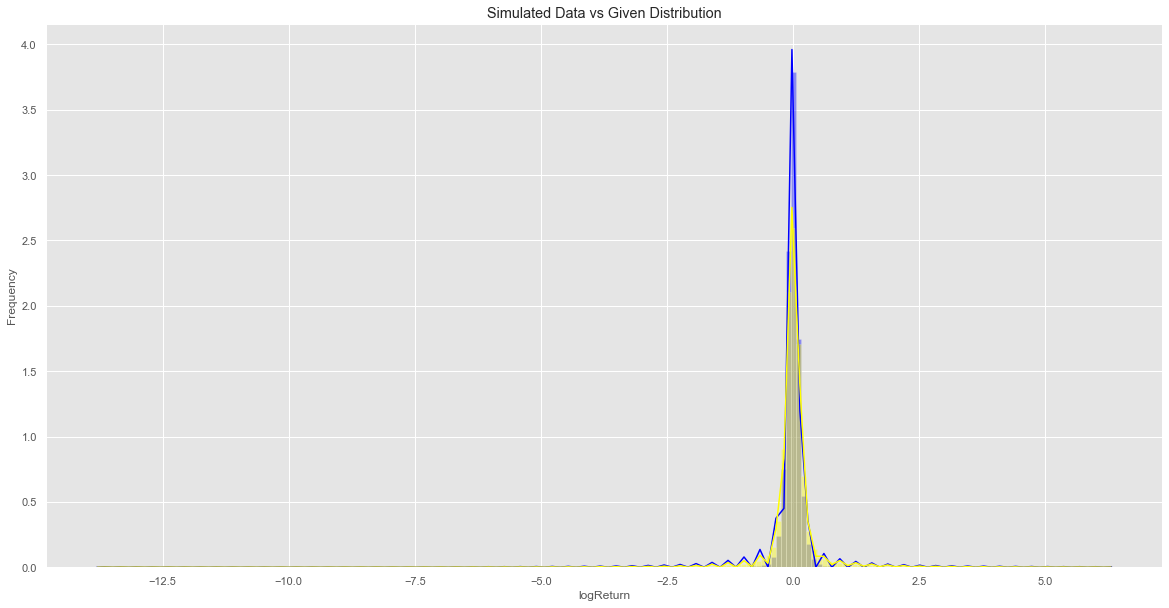

In [137]:
plt.figure(figsize=(20, 10))
ax = sns.distplot(df1['logReturn'],
                  bins=200,
                  kde=True,
                  color='blue')
ax = sns.distplot(gen_logR,
                  bins=200,
                  kde=True,
                  color='yellow')
ax.set(xlabel='logReturn', ylabel='Frequency')
plt.title('Simulated Data vs Given Distribution')

### Rolling Mean and Rolling SD

##### Close Prices

In [152]:
df1.head()

,Open,High,Low,Close,Up,Down,logReturn,vol_sqd_return,abs_return,AbsLog,pdf,cdf,rolling_mean_ST_10,rolling_mean_LT_20,rolling_SD_ST_10,rolling_SD_LT_20,rolling_mean_ST_20,rolling_mean_LT_100,rolling_SD_ST_20,rolling_SD_LT_100
DateTime,,,,,,,,,,,,,,,,,,,,
2015-03-23 09:40:00,67.15,67.28,67.15,67.28,487,195,0.178518,0.031869,0.178518,0.178518,0.000029,0.000029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-23 09:45:00,67.22,67.30,67.16,67.17,390,973,-0.163630,0.026775,0.163630,0.163630,0.000027,0.000056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-23 09:50:00,67.14,67.14,66.99,66.99,389,1461,-0.268336,0.072004,0.268336,0.268336,0.000044,0.000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-23 09:55:00,66.93,67.02,66.90,67.02,1242,292,0.044773,0.002005,0.044773,0.044773,0.000007,0.000107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-23 10:00:00,67.04,67.09,66.87,66.87,1066,584,-0.224065,0.050205,0.224065,0.224065,0.000037,0.000144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
df1['rolling_mean_ST_20'] = df1.Close.rolling(window=20).mean()
df1['rolling_mean_LT_100'] = df1.Close.rolling(window=100).mean()
df1['rolling_SD_ST_20'] = df1.Close.rolling(window=20).std()
df1['rolling_SD_LT_100'] = df1.Close.rolling(window=100).std()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

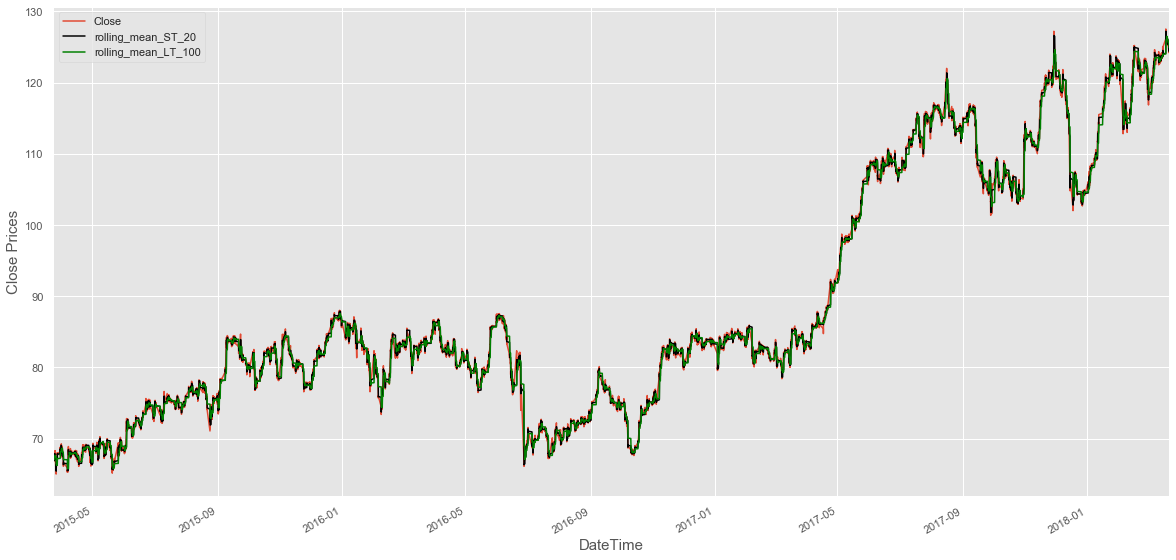

In [177]:
df1.Close.plot(figsize=(20,10))
df1.rolling_mean_ST_20.plot(figsize=(20,10),color='black')
df1.rolling_mean_LT_100.plot(figsize=(20,10),color='green')
#df_1_day.rolling_mean_LT.plot(figsize=(20,5))
plt.xlabel("DateTime",size=15)
plt.ylabel("Close Prices",size=15)
plt.legend()

##### Returns Rolling Mean

In [178]:
df1['rolling_mean_ST_20'] = df1.logReturn.rolling(window=20).mean()
df1['rolling_mean_LT_100'] = df1.logReturn.rolling(window=100).mean()
df1['rolling_SD_ST_20'] = df1.logReturn.rolling(window=20).std()
df1['rolling_SD_LT_100'] = df1.logReturn.rolling(window=100).std()

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [179]:
df1.tail()

,Open,High,Low,Close,Up,Down,logReturn,vol_sqd_return,abs_return,AbsLog,...,cdf,rolling_mean_ST_10,rolling_mean_LT_20,rolling_SD_ST_10,rolling_SD_LT_20,rolling_mean_ST_20,rolling_mean_LT_100,rolling_SD_ST_20,rolling_SD_LT_100,rolling_mean_LT_200
DateTime,,,,,,,,,,,,,,,,,,,,,
2018-03-22 15:40:00,124.64,124.71,124.63,124.65,5900,7700,-0.008022,0.000064,0.008022,0.008022,...,0.999962,-0.014020,-0.008150,0.053966,0.115334,-0.014020,-0.008150,0.053966,0.115334,125.36455
2018-03-22 15:45:00,124.65,124.70,124.58,124.62,1400,2509,-0.024070,0.000579,0.024070,0.024070,...,0.999966,-0.015223,-0.009583,0.053905,0.114623,-0.015223,-0.009583,0.053905,0.114623,125.35655
2018-03-22 15:50:00,124.53,124.56,124.44,124.51,1400,3300,-0.088307,0.007798,0.088307,0.088307,...,0.999980,-0.019239,-0.010784,0.056278,0.114814,-0.019239,-0.010784,0.056278,0.114814,125.34835
2018-03-22 15:55:00,124.58,124.70,124.49,124.64,4000,5400,0.104355,0.010890,0.104355,0.104355,...,0.999997,-0.014421,-0.010058,0.062511,0.115314,-0.014421,-0.010058,0.062511,0.115314,125.34140
2018-03-22 16:00:00,124.63,124.70,124.60,124.66,14240,10000,0.016045,0.000257,0.016045,0.016045,...,1.000000,-0.010818,-0.009818,0.062063,0.115343,-0.010818,-0.009818,0.062063,0.115343,125.33435


C:\Users\TAN\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\TAN\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


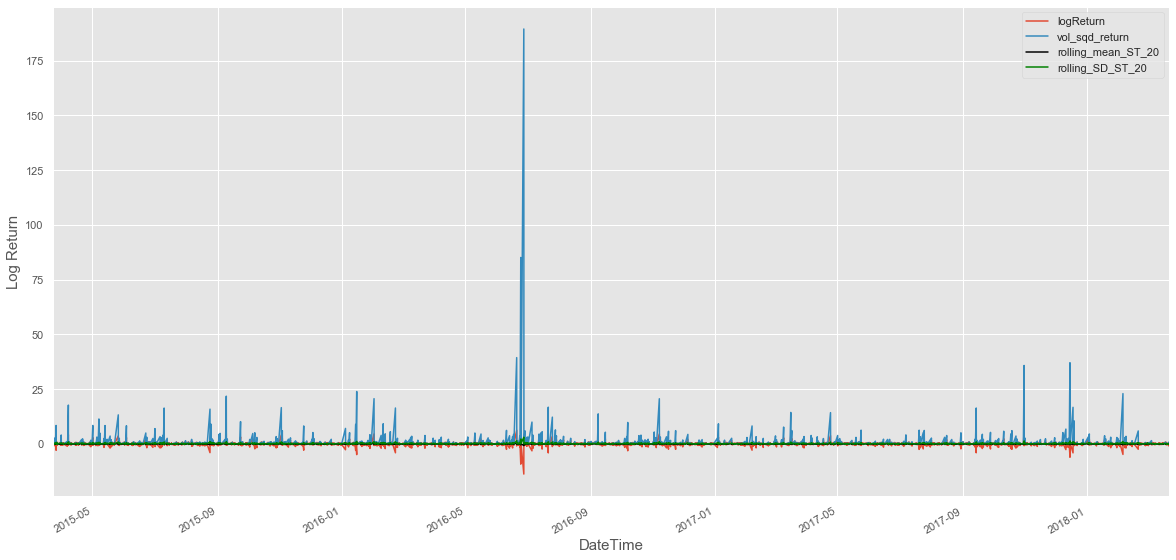

In [180]:
df1.logReturn.plot(figsize=(20,10))
df1.vol_sqd_return.plot(figsize=(20,10))
df1.rolling_mean_ST_20.plot(figsize=(20,10),color='black')
df1.rolling_SD_ST_20.plot(figsize=(20,10),color='green')
#df_1_day.rolling_mean_LT.plot(figsize=(20,5))
plt.xlabel("DateTime",size=15)
plt.ylabel("Log Return",size=15)
plt.legend()

Text(0.5, 1.0, 'Measure of Volatility')

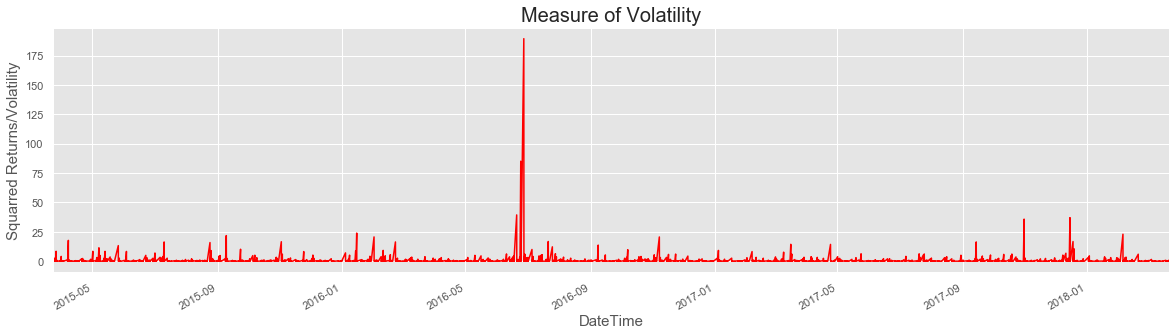

In [181]:
#df_1_day.percent_logReturn.plot(figsize=(20,5),color='red')
df1.vol_sqd_return.plot(figsize=(20,5),color='red')
plt.xlabel("DateTime",size=15)
plt.ylabel("Squarred Returns/Volatility",size=15)
plt.title('Measure of Volatility',size=20)

## Stylized Facts

### 1. Distribution of returns is not normal
### QQ (Quantile Quantile Plot)

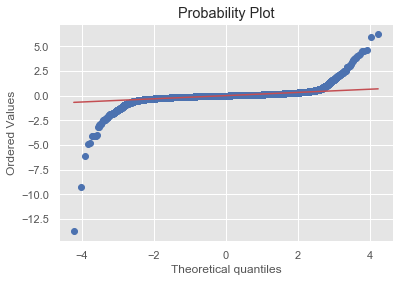

In [182]:
scipy.stats.probplot(df1.logReturn,plot = pylab,fit=True)
pylab.show()

#### A normal probability plot, or more specifically a quantile-quantile (Q-Q) plot, shows the distribution of the data against 
#### the expected normal distribution If the data is non-normal, the points form a curve that deviates markedly from a straight line.

In [183]:
from scipy import stats

In [184]:
stats.skew(df1.logReturn[1:])

-4.776913931271941

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'logReturn')]

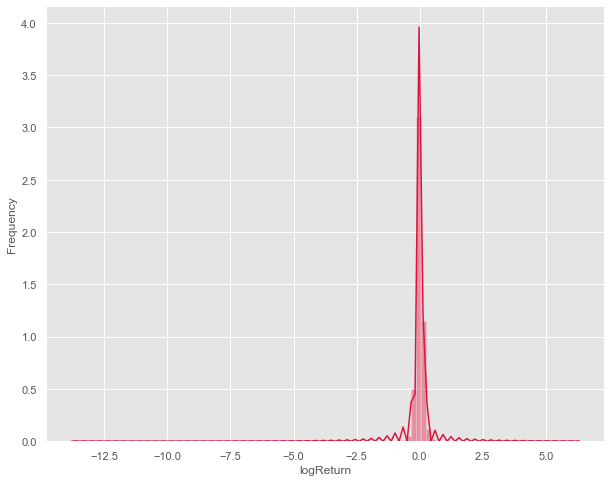

In [185]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(df1['logReturn'],
                  bins=100,
                  kde=True,
                  color='crimson')
ax.set(xlabel='logReturn', ylabel='Frequency')

In [186]:
stats.kurtosis(df1.logReturn[1:])

464.7973279290419

In [187]:
stats.jarque_bera(df1.logReturn[1:])

(520390792.0461457, 0.0)

Text(0.5, 1.0, 'Boxplot to measure Outliers')

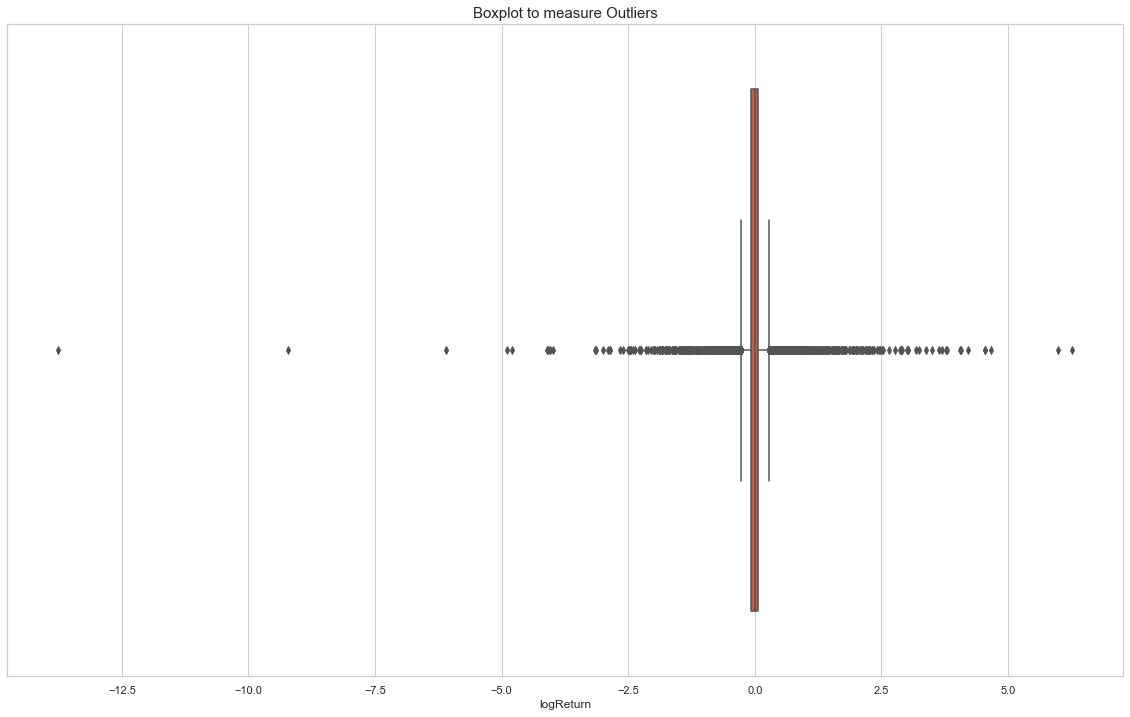

In [188]:
import seaborn as sns
from matplotlib import style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))
plt.xlabel('LogReturn')
style.use('ggplot')
sns.boxplot(x=df1['logReturn'])
plt.title('Boxplot to measure Outliers',size=15)

### 2. Checking for stationary using Dickey Fuller hypothesis Test

In [189]:
import statsmodels.tsa.stattools as sts

In [190]:
df1

,Open,High,Low,Close,Up,Down,logReturn,vol_sqd_return,abs_return,AbsLog,...,cdf,rolling_mean_ST_10,rolling_mean_LT_20,rolling_SD_ST_10,rolling_SD_LT_20,rolling_mean_ST_20,rolling_mean_LT_100,rolling_SD_ST_20,rolling_SD_LT_100,rolling_mean_LT_200
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-03-23 09:40:00,67.15,67.28,67.15,67.28,487,195,0.178518,0.031869,0.178518,0.178518,...,0.000029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-23 09:45:00,67.22,67.30,67.16,67.17,390,973,-0.163630,0.026775,0.163630,0.163630,...,0.000056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-23 09:50:00,67.14,67.14,66.99,66.99,389,1461,-0.268336,0.072004,0.268336,0.268336,...,0.000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-23 09:55:00,66.93,67.02,66.90,67.02,1242,292,0.044773,0.002005,0.044773,0.044773,...,0.000107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-23 10:00:00,67.04,67.09,66.87,66.87,1066,584,-0.224065,0.050205,0.224065,0.224065,...,0.000144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-22 15:40:00,124.64,124.71,124.63,124.65,5900,7700,-0.008022,0.000064,0.008022,0.008022,...,0.999962,-0.014020,-0.008150,0.053966,0.115334,-0.014020,-0.008150,0.053966,0.115334,125.36455
2018-03-22 15:45:00,124.65,124.70,124.58,124.62,1400,2509,-0.024070,0.000579,0.024070,0.024070,...,0.999966,-0.015223,-0.009583,0.053905,0.114623,-0.015223,-0.009583,0.053905,0.114623,125.35655
2018-03-22 15:50:00,124.53,124.56,124.44,124.51,1400,3300,-0.088307,0.007798,0.088307,0.088307,...,0.999980,-0.019239,-0.010784,0.056278,0.114814,-0.019239,-0.010784,0.056278,0.114814,125.34835


In [191]:
df1.isna().sum()

Open                     0
High                     0
Low                      0
Close                    0
Up                       0
Down                     0
logReturn                0
vol_sqd_return           0
abs_return               0
AbsLog                   0
pdf                      0
cdf                      0
rolling_mean_ST_10      19
rolling_mean_LT_20      99
rolling_SD_ST_10        19
rolling_SD_LT_20        99
rolling_mean_ST_20      19
rolling_mean_LT_100     99
rolling_SD_ST_20        19
rolling_SD_LT_100       99
rolling_mean_LT_200    199
dtype: int64

In [192]:
df1 = df1.dropna()

In [193]:
df1

,Open,High,Low,Close,Up,Down,logReturn,vol_sqd_return,abs_return,AbsLog,...,cdf,rolling_mean_ST_10,rolling_mean_LT_20,rolling_SD_ST_10,rolling_SD_LT_20,rolling_mean_ST_20,rolling_mean_LT_100,rolling_SD_ST_20,rolling_SD_LT_100,rolling_mean_LT_200
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-03-25 13:15:00,67.45,67.51,67.31,67.31,585,1462,-0.237424,0.056370,0.237424,0.237424,...,0.003717,-0.037742,-0.000297,0.118047,0.233097,-0.037742,-0.000297,0.118047,0.233097,67.36250
2015-03-25 13:20:00,67.30,67.44,67.30,67.38,974,389,0.103942,0.010804,0.103942,0.103942,...,0.003734,-0.028857,0.000445,0.121821,0.233312,-0.028857,0.000445,0.121821,0.233312,67.36300
2015-03-25 13:25:00,67.36,67.38,67.30,67.30,292,853,-0.118800,0.014113,0.118800,0.118800,...,0.003753,-0.030368,-0.000446,0.122785,0.233598,-0.030368,-0.000446,0.122785,0.233598,67.36365
2015-03-25 13:30:00,67.26,67.34,67.21,67.34,682,560,0.059418,0.003530,0.059418,0.059418,...,0.003763,-0.027397,-0.001039,0.124268,0.233367,-0.027397,-0.001039,0.124268,0.233367,67.36540
2015-03-25 13:35:00,67.33,67.50,67.33,67.50,1267,194,0.237318,0.056320,0.237318,0.237318,...,0.003802,-0.028069,0.000593,0.122711,0.234466,-0.028069,0.000593,0.122711,0.234466,67.36780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-22 15:40:00,124.64,124.71,124.63,124.65,5900,7700,-0.008022,0.000064,0.008022,0.008022,...,0.999962,-0.014020,-0.008150,0.053966,0.115334,-0.014020,-0.008150,0.053966,0.115334,125.36455
2018-03-22 15:45:00,124.65,124.70,124.58,124.62,1400,2509,-0.024070,0.000579,0.024070,0.024070,...,0.999966,-0.015223,-0.009583,0.053905,0.114623,-0.015223,-0.009583,0.053905,0.114623,125.35655
2018-03-22 15:50:00,124.53,124.56,124.44,124.51,1400,3300,-0.088307,0.007798,0.088307,0.088307,...,0.999980,-0.019239,-0.010784,0.056278,0.114814,-0.019239,-0.010784,0.056278,0.114814,125.34835


#### Check if close prices are not Stationary

In [81]:
sts.adfuller(df1.Close)

(-0.5793687138035164,
 0.8755760392280213,
 4,
 57783,
 {'1%': -3.4304631749913375,
  '5%': -2.861590021170347,
  '10%': -2.56679662458877},
 -30438.024410663318)

#### Null Hypothesis : Close Prices are not stationary
#### T test statistic > Critical Value at 1% , 5% and 10% confidence level
#### p value > 0.05 (5% level) 
##### Result : We can't reject null hypothesis--> Close Prices are not stationary

#### Returns

In [83]:
# Returns are Stationary
sts.adfuller(df1.logReturn)

(-125.64097113162163,
 0.0,
 3,
 57784,
 {'1%': -3.4304631730326633,
  '5%': -2.861590020304667,
  '10%': -2.566796624127995},
 -14270.092787783215)

#### Null Hypothesis : Returns are not stationary
#### T test statistic < Critical Value at 1% , 5% and 10% confidence level
#### p value < 0.05 (5% level) - Significant
#### Result : We reject null hypothesis--> Returns are stationary

## Autocorrelation ACF for prices

Text(0.5, 1.0, 'ACF LAG')

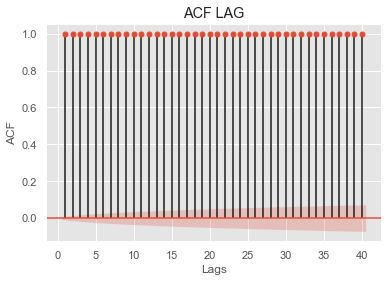

In [84]:
### Prices are highly autocorrelated
sgt.plot_acf(df1.Close,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title("ACF LAG")

## Autocorrelation ACF for Returns

Text(0.5, 1.0, 'ACF LAG')

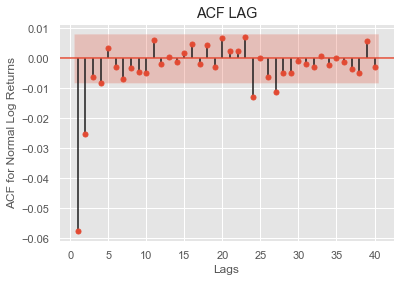

In [85]:
### Returns are not much autocorrelated as shown by the significance level
sgt.plot_acf(df1.logReturn[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('ACF for Normal Log Returns')
plt.title("ACF LAG")

In [393]:
df1.head()

,marketClose,logReturn,vol_sqd_return
DateTime,,,
02-04-2019 09:30,300.00,NaN,NaN
02-04-2019 09:31,292.97,-0.023712,0.000562
02-04-2019 09:32,295.12,0.007312,0.000053
02-04-2019 09:33,296.28,0.003923,0.000015
02-04-2019 09:34,296.57,0.000978,0.000001
